# Book 3: How to concatenate data frames

Here we will go over how to use ```pandas``` to read several ```.csv``` files and then **concatenate** them into a single table. This is very useful to load the results of different conditions, or biological replicates, and to **tag** these conditions so we can later use them to compare results and do statistical tests.

## Load the data
Let us use what we learned before to load the ```.csv``` table into a data frame

In [1]:
import pandas as pd 

df1 = pd.read_csv('./data/Results_01.csv')

df1.head()

,,Label,Area,Perim.,Circ.,AR,Round,Solidity
0,1,blobs.gif,425,90.42641,0.65314,2.06670,0.48386,0.88542
1,2,blobs.gif,181,55.21320,0.74611,1.77749,0.56259,0.94517
2,3,blobs.gif,656,96.52691,0.88474,1.06472,0.93921,0.96970
3,4,blobs.gif,430,79.11270,0.86335,1.06156,0.94201,0.95662
4,5,blobs.gif,477,86.04163,0.80968,1.56805,0.63773,0.96657


Lets add a colum to describe the "student" that made the analysis

In [2]:
df1['Student'] = '01'
# Now I use "sample" to get 10 random examples from the table
df1.sample(10)

,,Label,Area,Perim.,Circ.,AR,Round,Solidity,Student
15,16,blobs.gif,391,85.49747,0.67217,2.45579,0.40720,0.90614,01
38,39,blobs.gif,231,55.94113,0.92760,1.18693,0.84251,0.93333,01
50,51,blobs.gif,600,91.39697,0.90260,1.34527,0.74334,0.95087,01
30,31,blobs.gif,598,109.63961,0.62514,2.74660,0.36409,0.85429,01
18,19,blobs.gif,257,59.11270,0.92423,1.33803,0.74737,0.95009,01
40,41,blobs.gif,403,75.01219,0.90002,1.36989,0.72998,0.94824,01
35,36,blobs.gif,263,59.69848,0.92734,1.26047,0.79335,0.94946,01
54,55,blobs.gif,848,112.91169,0.83585,1.55261,0.64408,0.95227,01
8,9,blobs.gif,220,54.52691,0.92985,1.12587,0.88820,0.92827,01
27,28,blobs.gif,171,53.21320,0.75887,1.75976,0.56826,0.94475,01


Now we can read a second dataset, and add an extra "student" 02 tag

In [3]:
df2 = pd.read_csv('./data/Results_02.csv')
df2['Student'] = '02'
df2.head()

,,Label,Area,Perim.,Circ.,AR,Round,Solidity,Student
0,1,blobs.gif,433,92.91169,0.63031,2.07469,0.48200,0.85998,02
1,2,blobs.gif,185,55.21320,0.76260,1.77847,0.56228,0.95116,02
2,3,blobs.gif,658,97.35534,0.87240,1.06829,0.93607,0.96694,02
3,4,blobs.gif,434,78.52691,0.88443,1.06364,0.94017,0.95912,02
4,5,blobs.gif,477,85.45584,0.82081,1.56967,0.63708,0.96755,02


Lets see if there are small differences or not

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

The mean value of Area for Student 1 is: 355.475.
The mean value of Area for Student 2 is: 347.547.


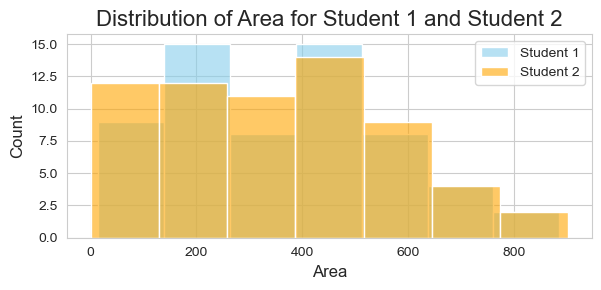

In [5]:
val = df1["Area"].mean()
print(f"The mean value of Area for Student 1 is: {val:.3f}.")

val = df2["Area"].mean()
print(f"The mean value of Area for Student 2 is: {val:.3f}.")

# Set the style for seaborn
sns.set_style("whitegrid")

# Create the figure and axis
plt.figure(figsize=(6, 3))

# Create the combined histogram
sns.histplot(data=df1, x="Area", color="skyblue", label="Student 1", kde=False, alpha=0.6)
sns.histplot(data=df2, x="Area", color="orange", label="Student 2", kde=False, alpha=0.6)

# Customize the plot
plt.title("Distribution of Area for Student 1 and Student 2", fontsize=16)
plt.xlabel("Area", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Add legend
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()

Now instead of keeping track of different data frames is easier if we put these tables together. This operation is called concatenation.

In [6]:
# concatenate
df = pd.concat([df1, df2])
df.sample(10)

,,Label,Area,Perim.,Circ.,AR,Round,Solidity,Student
54,55,blobs.gif,555,87.25483,0.91606,1.07320,0.93180,0.95361,02
4,5,blobs.gif,477,85.45584,0.82081,1.56967,0.63708,0.96755,02
24,25,blobs.gif,500,87.94113,0.81245,1.66888,0.59921,0.96525,01
19,20,blobs.gif,350,68.76955,0.93001,1.16836,0.85590,0.94340,02
48,49,blobs.gif,69,38.97056,0.57093,2.96497,0.33727,0.88462,02
20,21,blobs.gif,148,44.87006,0.92376,1.18725,0.84228,0.92500,01
48,49,blobs.gif,156,45.69848,0.93871,1.26978,0.78754,0.92308,01
29,30,blobs.gif,545,86.91169,0.90667,1.22458,0.81661,0.94865,02
14,15,blobs.gif,441,77.84062,0.91461,1.20597,0.82920,0.94635,01
35,36,blobs.gif,22,17.31371,0.92226,1.46402,0.68305,0.86275,02


In [7]:
# ldet us clean up the table a bit
df.reset_index(drop=True, inplace=True)
df.sample(5)

,,Label,Area,Perim.,Circ.,AR,Round,Solidity,Student
8,9,blobs.gif,220,54.52691,0.92985,1.12587,0.88820,0.92827,01
109,49,blobs.gif,69,38.97056,0.57093,2.96497,0.33727,0.88462,02
81,21,blobs.gif,159,46.28427,0.93270,1.22497,0.81634,0.92982,02
35,36,blobs.gif,263,59.69848,0.92734,1.26047,0.79335,0.94946,01
50,51,blobs.gif,600,91.39697,0.90260,1.34527,0.74334,0.95087,01


In [8]:
# I want to remove that first colum that has no proper name
df.drop(' ', axis=1, inplace=True)
df.sample(5)

,Label,Area,Perim.,Circ.,AR,Round,Solidity,Student
3,blobs.gif,430,79.11270,0.86335,1.06156,0.94201,0.95662,01
123,blobs.gif,53,35.55635,0.52681,2.85939,0.34973,0.89076,02
42,blobs.gif,234,55.69848,0.94785,1.13093,0.88423,0.94545,01
105,blobs.gif,377,72.52691,0.90064,1.28529,0.77803,0.95202,02
101,blobs.gif,167,48.04163,0.90927,1.29054,0.77487,0.93296,02


Now let us do a basic boxplot to see if the results of both students are significantly different from one another. Here we benefit from the **Student** tag, we can ask the boxplot to sort the results based on this column value using the ```by=``` variable.

<Axes: title={'center': 'Area'}, xlabel='Student'>

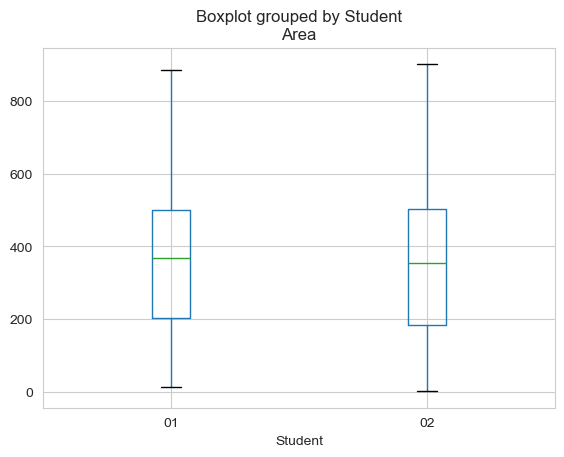

In [9]:
df.boxplot(column="Area",by="Student")

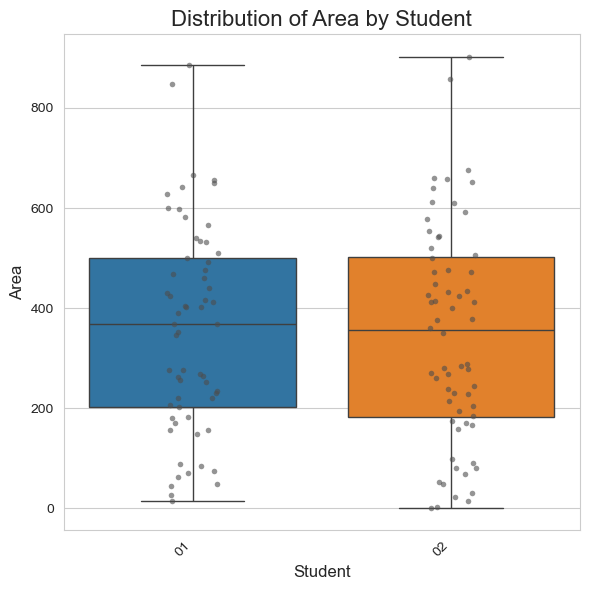

In [10]:
# Set the style for seaborn
sns.set_style("whitegrid")

# Create the figure and axis
plt.figure(figsize=(6, 6))

# Create the boxplot with updated parameters
ax = sns.boxplot(x="Student", y="Area", data=df, hue="Student", legend=False)

# Customize the plot
ax.set_title("Distribution of Area by Student", fontsize=16)
ax.set_xlabel("Student", fontsize=12)
ax.set_ylabel("Area", fontsize=12)

# Rotate x-axis labels if there are many students
plt.xticks(rotation=45, ha='right')

# Add individual data points
sns.stripplot(x="Student", y="Area", data=df, color=".3", size=4, alpha=0.6)

# Adjust layout and display the plot
plt.tight_layout()

# How to save data frames into new .csv files

Now that we have concatenated all our tables into a new more pratical one we can then save this new table.

In [11]:
# writting the table
df.to_csv('./data/Results_total.csv')